In [32]:
'''
!pip install pyyaml
!pip install matplotlib-venn
!pip install tables
!pip install networkx
!pip install pandas
!pip install seaborn
!pip install dask
!pip install scikit-image
!pip install holoviews
!pip install xarray
'''

'\n!pip install pyyaml\n!pip install matplotlib-venn\n!pip install tables\n!pip install networkx\n!pip install pandas\n!pip install seaborn\n!pip install dask\n!pip install scikit-image\n!pip install holoviews\n!pip install xarray\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
from pprint import pprint
import sqlite3
import yaml
import re
import datetime
import dask.dataframe as dd
import tables
from scipy.spatial.distance import cosine

try: # for pip >= 10
    from pip._internal.req import parse_requirements
except ImportError: # for pip <= 9.0.3
    from pip.req import parse_requirements

from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

import networkx as nx
import networkx.algorithms.community as nxcom

import bokeh.io
from bokeh.io import output_file, show
from bokeh.resources import INLINE
from bokeh.models import (BoxSelectTool, Circle, EdgesAndLinkedNodes, HoverTool,
                          MultiLine, NodesAndLinkedEdges, Plot, Range1d, TapTool,
                         BoxZoomTool, ResetTool, OpenURL, CustomJS, Column, SaveTool)
from bokeh.palettes import Spectral4
from bokeh.plotting import figure, output_notebook
from bokeh.models.graphs import from_networkx
from bokeh.models import TextInput, Button

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

## Easier navigation:

------------------------------------

### 1. <a href='#setup'>Setup</a>
------------------------------------
### 2. <a href='#null'>Null values</a>
### 3. <a href='#ok'>`column`: ok</a>
### 4. <a href='#seda'>Spec EDA</a>
### 5. <a href='#sinp'>Sample Inputs for each column</a>
------------------------------------
### 6. <a href='#conda'>`column`: conda - parse</a>
### 7. <a href='#pip'>`column`: pip - parse</a>
### 8. <a href='#dpdf'>Building a dependency df on conda/pip</a>
------------------------------------
### 9. <a href='#lpick'>Load pickle</a>
### 10. <a href='#leda'>Library EDA</a>
### 11. <a href='#veda'>Library Version EDA</a>
### 12. <a href='#cpdiff'>Conda/Pip difference</a>
------------------------------------
### 13. <a href='#hgg'>Heatmap Graph Generation</a>
### 14. <a href='#nex'>NetworkX Setup</a>
### 15. <a href='#nv'>Bokeh Visualizations</a>
### 16. <a href='#fnl'>NetworkX graph to Gephi</a>
### 17. <a href='#end'>More visualizations</a>

<a name='setup'></a>
## 1. Setup

<br>

In [116]:
con = sqlite3.connect('binder-specs.sqlite')
df = pd.read_sql('SELECT * FROM specs', con)

DatabaseError: Execution failed on sql 'SELECT * FROM events': no such table: events

In [4]:
df.columns

Index(['ok', 'remote', 'git_ref', 'git_commit', 'apt', 'conda', 'pip',
       'pipfile', 'docker', 'setup', 'julia', 'r', 'nix', 'postbuild', 'start',
       'runtime', 'ls', 'resolved_commit'],
      dtype='object')

In [5]:
df

,ok,remote,git_ref,git_commit,apt,conda,pip,pipfile,docker,setup,julia,r,nix,postbuild,start,runtime,ls,resolved_commit
0,0,00Kai0/jupyter-book,master,,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,0,00quanta/practicalAI,master,,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,0,00quanta/requirements,master,,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,0,04x/instagramCracker,master,,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,0,1-Nameless-1/Lign167,59804a761525c729b6b7965e0526f4b4b25d5ddd,,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166074,1,mdpetters/MEA-412-Notebooks,master,,None,None,None,None,# Dockerfile for building Atmospheric-Physics-...,None,"name = ""Atmospheric Physics""\nuuid = ""13a5dcd1...",None,None,None,None,None,"{"".gitignore"": 12, "".travis.yml"": 822, ""Docker...",e0ff4987ab44c3574b78a5022d244e659cab64ba
166075,1,mdpetters/mdpetters.github.io,740205b0c280e5d3998a1b1adcfef795c6c44711,,None,None,None,None,None,None,None,None,None,None,None,None,"{"".ipynb_checkpoints"": {""Thar Dust Charge Corr...",740205b0c280e5d3998a1b1adcfef795c6c44711
166076,1,mdpiper/notebooks,master,,None,None,None,None,None,None,None,None,None,None,None,None,"{"".gitignore"": 1203, ""LICENSE"": 1067, ""README....",5f88f0d6e37eab7125cfded784fe64a07a2cfe73
166077,1,mdreck/mdreck.github.io,master,222338c70f1e76802bf36769bf3f95bd6940e07a,None,None,None,None,None,None,None,None,None,None,None,None,"{""CHANGELOG.md"": 55635, ""Gemfile"": 37, ""LICENS...",222338c70f1e76802bf36769bf3f95bd6940e07a


In [6]:
dash = '-' * 60

<a name='null'></a>
## 2. Null values
Printing the number of null values in each column.

<br>

In [7]:
print('{:<15s}{:>8s}{:>20s}'.format('Name', 'Null values', 'Null %'))
print(dash)
for col in df.columns:
    print('{:<15s}{:>8s}{:>20s}'.format(col, str(len(df[df[col].isnull()])), str(round(len(df[df[col].isnull()]) / len(df), 2))))

Name           Null values              Null %
------------------------------------------------------------
ok                    0                 0.0
remote                0                 0.0
git_ref               0                 0.0
git_commit            0                 0.0
apt              155452                0.94
conda            131613                0.79
pip              111902                0.67
pipfile          165166                0.99
docker           155892                0.94
setup            155002                0.93
julia            163536                0.98
r                161233                0.97
nix              166044                 1.0
postbuild        144966                0.87
start            162859                0.98
runtime          157931                0.95
ls                 9825                0.06
resolved_commit   19334                0.12


The "" values were considered null but they are mainly applied for git_commit, which doesn't really matter too much (an empty commit is still a commit).

In [8]:
print('{:<15s}{:>8s}{:>20s}'.format('Name', 'Non-null values', 'Non-null %'))
print(dash)

for col in df.columns:
    nonnull = len(df[~df[col].isnull()][df[col] != ""][df[col] != "\n"])
    print('{:<15s}{:>8s}{:>20s}'.format(col, str(nonnull), str(round(nonnull / len(df), 2))))


Name           Non-null values          Non-null %
------------------------------------------------------------
ok               166079                 1.0
remote           166079                 1.0
git_ref          166079                 1.0
git_commit       107113                0.64
apt               10436                0.06
conda             34463                0.21
pip               53721                0.32
pipfile             913                0.01
docker            10187                0.06
setup             11072                0.07
julia              2483                0.01
r                  4823                0.03
nix                  35                 0.0
postbuild         21024                0.13
start              3220                0.02
runtime            8130                0.05
ls               156254                0.94
resolved_commit  146745                0.88


Many of the columns list dependencies (conda, pip, apt, pipfile, setup, julia, r, nix, runtime) and are pretty rare occurrences, but it would be useful to look at how many entries have AT LEAST one form of dependency listed.

In [9]:
list_of_cols = ["conda", "pip", "apt", "pipfile", "setup", "julia", "r", "nix", "runtime"]
len(df[list_of_cols].dropna(thresh=1))

95598

<a name='ok'></a>
## 3. col: `ok`

Comparing the proportion of null values in entries where `ok`=1 against entries where `ok`=0.

<br>

In [10]:
sum(df["ok"])

146745

In [11]:
ok_df = df[df["ok"] == 1]
nok_df = df[df["ok"] == 0]

print('{:<15s}{:>8s}{:>20s}'.format('Name', 'Null in ok=1', 'Null in ok=0'))
print(dash)
for col in df.columns:
    print('{:<15s}{:>10s}{:>20s}'.format(col, str(round(len(ok_df[ok_df[col].isnull()]) / len(ok_df), 2)), 
                                        str(round(len(nok_df[nok_df[col].isnull()]) / len(nok_df), 2))))


Name           Null in ok=1        Null in ok=0
------------------------------------------------------------
ok                    0.0                 0.0
remote                0.0                 0.0
git_ref               0.0                 0.0
git_commit            0.0                 0.0
apt                  0.93                 1.0
conda                0.77                 1.0
pip                  0.63                 1.0
pipfile              0.99                 1.0
docker               0.93                 1.0
setup                0.92                 1.0
julia                0.98                 1.0
r                    0.97                 1.0
nix                   1.0                 1.0
postbuild            0.86                 1.0
start                0.98                 1.0
runtime              0.94                 1.0
ls                    0.0                0.51
resolved_commit       0.0                 1.0


<a name='seda'></a>
## 4. Spec EDA

<br>

ok               146745                 1.0
remote           146745                 1.0
git_ref          146745                 1.0
git_commit        98329                0.67
apt               10436                0.07
conda             34463                0.23
pip               53721                0.37
pipfile             913                0.01
docker            10187                0.07
setup             11072                0.08
julia              2483                0.02
r                  4823                0.03
nix                  35                 0.0
postbuild         21024                0.14
start              3220                0.02
runtime            8130                0.06
ls               146745                 1.0
resolved_commit  146745                 1.0


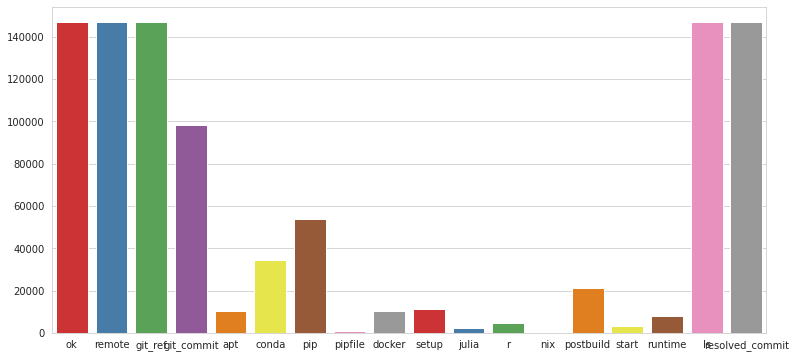

In [12]:
nnull_x, nnull_y = [], []
for col in ok_df.columns:
    nonnull = len(ok_df[~ok_df[col].isnull()][ok_df[col] != ""][ok_df[col] != "\n"])
    print('{:<15s}{:>8s}{:>20s}'.format(col, str(nonnull), str(round(nonnull / len(ok_df), 2))))
    nnull_x.append(col)
    nnull_y.append(nonnull)
    
plt.figure(figsize=(12.8,6))
plot = sns.barplot(x=nnull_x, y=nnull_y, palette="Set1")

As the `ok`=0 entries have 100% null values in most columns, will exclude from future visualizations.

We expect the entries with at least one dependency col to be the same, and find that roughly **65%** of the `ok_df` entries satisfy this.

In [13]:
list_of_cols = ["conda", "pip", "apt", "pipfile", "setup", "julia", "r", "nix", "runtime"]
len(ok_df[list_of_cols].dropna(thresh=1)), len(ok_df[list_of_cols].dropna(thresh=1)) / len(ok_df)

(95598, 0.6514566084023306)

In particular, we are interested in seeing the % for conda/pip. We use a new total where at least one dependency is present. To get the total conda+pip columns, we can do **A+B-AB**, since the overlap is considered twice in A+B. Then, divide this by the total to get a proportion.

In [14]:
venn_total = len(ok_df[list_of_cols].dropna(thresh=1))
venn_CP = len(df[~df['pip'].isnull()][~df['conda'].isnull()])
venn_C = len(df[~df['pip'].isnull()][df['conda'].isnull()])
venn_P = len(df[df['pip'].isnull()][~df['conda'].isnull()])
venn_none = venn_total - venn_C - venn_P

print(venn_C + venn_P - venn_CP, (venn_C + venn_P - venn_CP) / venn_total)

77705 0.8128308123600912


So, **81%** of entries with at least one dependency use conda/pip. We can also represent this in a venn diagram, with percentages to label the portions, where "The subsets parameter is a 3 element list where the numbers 30, 10, 5 correspond to Ab, aB, AB."

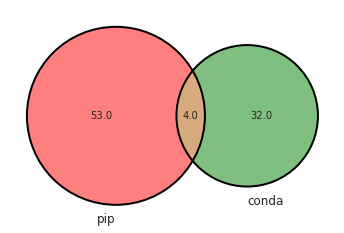

In [15]:
vA, vB, vAB = round(venn_C / venn_total, 2) * 100, round(venn_P / venn_total, 2) * 100, round(venn_CP / venn_total, 2) * 100
venn2(subsets = (vA, vB, vAB), set_labels = ('pip', 'conda'), alpha = 0.5)
venn2_circles(subsets = (vA, vB, vAB));

<a name='sinp'></a>
## 5. Sample inputs for each column

<br>

In [16]:
class color:
    RED = '\033[91m'
    BOLD = '\033[1m'
    END = '\033[0m'


for col in ok_df.columns:
    col_inputs = ok_df[~ok_df[col].isnull()][ok_df[col] != ""][ok_df[col] != "\n"][col].reset_index()[col]
    print(color.BOLD + color.RED + "COLUMN: " + col + color.END)
    
    for i in np.arange(5):
        print(str(i) + " " + str(col_inputs[i]))
        
    print()
    print(dash)
    print()

COLUMN: ok
0 1
1 1
2 1
3 1
4 1

------------------------------------------------------------

COLUMN: remote
0 mdsmith44/Army_ORSA_Python_Data_Analysis_Tutorial
1 mdsmith44/Git-Test
2 mdssmith/binder_test
3 mdsumner/polar-mapping-oghub
4 me2d09/coviduberounky

------------------------------------------------------------

COLUMN: git_ref
0 master
1 master
2 master
3 master
4 master

------------------------------------------------------------

COLUMN: git_commit
0 ab1be186a74c81c83f863bc3b6258fee46eeca56
1 9267f689d1935f5670e00d63b4f9639226f599ec
2 6464ab1b75787590096275bf36b6e3035f23d2ab
3 f4d256f2e4e8688261871073f9e7f87cacd7486c
4 562d55fbc439fbf936f32fcb9e09fbfa1f145936

------------------------------------------------------------

COLUMN: apt
0 vim

1 vim

2 openjdk-8-jdk
3 openjdk-8-jdk
4 openjdk-8-jdk

------------------------------------------------------------

COLUMN: conda
0 name: binder-example
dependencies:
    - python=3.7
    - numpy
    - pandas
    - matplotlib
1 # Conda

COLUMN: docker
0 FROM rocker/binder:3.6.0
LABEL maintainer='Michael D. Sumner'
USER root
COPY . ${HOME}
RUN chown -R ${NB_USER} ${HOME}
USER ${NB_USER}



RUN wget https://github.com/mdsumner/polar-mapping-oghub/raw/master/DESCRIPTION && R -e "options(repos = list(CRAN = 'http://mran.revolutionanalytics.com/snapshot/2019-08-23/')); devtools::install_deps()"

RUN rm DESCRIPTION.1

1 FROM jgillis/jupyter-octave:latest

USER root


#ADD https://github.com/casadi/binaries/releases/download/commit-2e2149b/casadi-linux-octave-4.2.2-2e2149b.tar.gz /tmp/octave.tar.gz
ADD https://github.com/casadi/binaries/releases/download/commit-bc66d96/casadi-linux-octave-4.2.2-bc66d96.tar.gz /tmp/octave.tar.gz
RUN chown $NB_USER:$NB_GID /tmp/octave.tar.gz

USER $NB_UID
RUN mkdir $HOME/casadi
RUN tar -xvf /tmp/octave.tar.gz -C $HOME/casadi
RUN rm /tmp/octave.tar.gz

RUN echo "addpath('$HOME/casadi');" > $HOME/.octaverc

RUN conda install -c damianavila82 RISE
COPY . ${HOME}
USER root
RUN chown -R ${NB_UID} $

COLUMN: runtime
0 r-2019-08-01

1 python-3.8

2 r-2019-02-14

3 python-2.7
4 python-2.7

------------------------------------------------------------

COLUMN: ls
0 {".ipynb_checkpoints": {"I. Python and Jupyter Primer-checkpoint.ipynb": 328416, "II. Data Management with Pandas-checkpoint.ipynb": 548104, "III. Data Visualization-checkpoint.ipynb": 6907509, "IV. Machine Learning and Other Topics-checkpoint.ipynb": 272376}, "Data": {"2019_Masters.csv": 4212, "ABAC Student_PE FY17.xlsx": 4703721, "ABAC_spending_viz.html": 1028290, "COVID_Tracking_Data_20200616.csv": 1279264, "COVID_Tracking_Data_20201007.csv": 3141100, "GFEBS_Unit_Spending-Copy.html": 961517, "GFEBS_Unit_Spending.html": 962556, "US_Square_Map.csv": 422, "Unit Spend Plan By LOE_ABAC 003-20.XLSX": 72716, "Unit_Spend_Plan_Analysis.ipynb": 2445497, "all_bashlite_attacks.csv": 6627636, "all_mirai_attacks.csv": 7617550, "cdcSmall.csv": 805881, "normal_traffic.csv": 17626152, "ptScores.csv": 5457, "state_populations.csv": 1475, "

Or, to look at a particular column:

In [17]:
col='conda'
ok_df[~ok_df[col].isnull()][col].reset_index()[col].value_counts()

name: example-environment\nchannels:\n  - conda-forge\ndependencies:\n  - numpy\n  - psutil\n  - toolz\n  - matplotlib\n  - dill\n  - pandas\n  - partd\n  - bokeh\n  - dask\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

<a name='conda'></a>
## 6. col: `conda` - parse

 - .loc is simply way too slow past n>1000. Creating a temp df with .at and appending every 1000 entries to the main df.

<br>

In [18]:
def conda_parse(df, delete_indices, dp_df, test_cap=9999999, benchmark=False):    
    conda_L = df[~df['conda'].isnull()]['conda'].reset_index()
    errors=0
    temp_df = pd.DataFrame()
    a = datetime.datetime.now()
    time_list = []
    for i in np.arange(min(test_cap, len(conda_L))):
        if (i % 1000 == 0):
            dp_df = dp_df.append(temp_df)
            temp_df = pd.DataFrame()
            if benchmark:
                b = datetime.datetime.now()
                c = b - a
                time_list.append(c.seconds)
                print(str(i) + " " + str(c.seconds))
                a = datetime.datetime.now()
        true_index = conda_L.at[i, "index"]
        try:
            dependency_list = yaml.load(conda_L['conda'][i], Loader=yaml.FullLoader)["dependencies"]
            for d_line in dependency_list:
                # will do something about this later
                if (type(d_line) != dict):
                    d_line = d_line.replace(" ", "").lower()
                    d_line = re.split('<=|>=|>|<|=', d_line, maxsplit=1)
                    d_name = d_line[0]
                    if (len(d_line) > 1):
                        d_type = d_line[1]
                        #dp_df.at[true_index, d_name] = d_type
                        temp_df.at[true_index, d_name] = d_type
                    else:
                        #dp_df.at[true_index, d_name] = "Default"
                        temp_df.at[true_index, d_name] = 'Default'
                        pass
                #temp_df.at[true_index, 'CONDAe'] = 1
        except:
            delete_indices.append(true_index)
    
    dp_df = dp_df.append(temp_df)
    if benchmark:
        b = datetime.datetime.now()
        c = b - a
        time_list.append(c.seconds)
        return delete_indices, dp_df, time_list[1:]
    return delete_indices, dp_df

delete_indices, dp_df, conda_times = conda_parse(ok_df, [], pd.DataFrame(), 100, True)

0 0


In [19]:
dp_coln = 300
dp_df.columns[dp_coln : dp_coln + 100]

Index(['pytest-remotedata', 'python-dateutil', 'python-libarchive-c', 'pytz',
       'pywavelets', 'pywin32', 'pywinpty', 'pyzmq', 'qt', 'qtawesome',
       'qtconsole', 'qtpy', 'requests', 'rope', 'ruamel_yaml', 'send2trash',
       'setuptools', 'simplegeneric', 'singledispatch', 'sip', 'six', 'snappy',
       'snowballstemmer', 'sortedcollections', 'sortedcontainers', 'soupsieve',
       'sphinx', 'sphinxcontrib', 'sphinxcontrib-applehelp',
       'sphinxcontrib-devhelp', 'sphinxcontrib-htmlhelp',
       'sphinxcontrib-jsmath', 'sphinxcontrib-qthelp',
       'sphinxcontrib-serializinghtml', 'sphinxcontrib-websupport', 'spyder',
       'spyder-kernels', 'sqlalchemy', 'sqlite', 'statsmodels', 'tblib',
       'tensorflow-base', 'tensorflow-estimator', 'tensorflow-gpu-base',
       'termcolor', 'terminado', 'testpath', 'tk', 'toolz', 'tornado',
       'traitlets', 'typed-ast', 'unicodecsv', 'urllib3', 'vc',
       'vs2015_runtime', 'wcwidth', 'webencodings', 'werkzeug', 'wheel',
       

In [20]:
conda_times[1:]

[]

<a name='pip'></a>
## 7. col: `pip` - parse

Notes:
 - Anything with a '#' is a comment, so the entire line (up until \n) after is discarded along with '#'.
 - There are large blocks of --hash where each hash is preceded by a '\\\n'. These can be removed with split. 
 - Same >=, <=, etc. rules apply as in conda, but instead of '=' it is now '=='.

<br>

In [21]:
df[~df['pip'].isnull()]['pip'].reset_index()['pip'][4].replace(" ", "").lower().split("\n")

['requests==2.24.0', 'beautifulsoup4==4.9.3', 'ufit==1.4.1', '']

In [22]:
"h#i"[:2]

'h#'

In [23]:
df[~df[col].isnull()][col].reset_index()[col][144]

'dependencies:\n  - python=3.8\n  - jupyter\n  - ipykernel\n  - plotly\n  - pandas\n'

In [24]:
def pip_parse(df, delete_indices, dp_df, test_cap=9999999, benchmark=False):    
    pip_L = df[~df['pip'].isnull()]['pip'].reset_index()
    errors=0
    temp_df = pd.DataFrame()
    a = datetime.datetime.now()
    time_list = []
    for i in np.arange(min(test_cap, len(pip_L))):
        if (i % 1000 == 0):
            d = datetime.datetime.now()
            e = d - a
            dp_df = dp_df.append(temp_df)
            temp_df = pd.DataFrame()
            if benchmark:
                b = datetime.datetime.now()
                c = b - d
                time_list.append(c.seconds + e.seconds)
                print(str(i) + " " + str(e.seconds) + " " + str(c.seconds))
                a = datetime.datetime.now()
        true_index = pip_L.at[i, "index"]
        try:
            dependency_list = pip_L['pip'][i].replace(" ", "").lower().split("\n")
            for d_line in dependency_list:
                # will do something about this later
                if ((d_line != '') and (d_line[:2] != "--")):
                    d_line = d_line.split("#")[0]
                    d_line = re.split('<=|>=|>|<|==|@', d_line, maxsplit=1)
                    d_name = d_line[0]
                    if (len(d_line) > 1):
                        d_type = d_line[1]
                        #dp_df.loc[true_index, d_name] = d_type
                        temp_df.at[true_index, d_name] = d_type
                    else:
                        #dp_df.loc[true_index, d_name] = "Default"
                        temp_df.at[true_index, d_name] = "Default"
                #temp_df.at[true_index, 'PIPe'] = 1
        except:
            delete_indices.append(true_index)
            
    dp_df = dp_df.append(temp_df)
    if benchmark:
        b = datetime.datetime.now()
        c = b - a
        time_list.append(c.seconds)
        return delete_indices, dp_df, time_list[1:]
    return delete_indices, dp_df

delete_indices, dp_df, pip_times = pip_parse(ok_df, [], pd.DataFrame(), 100, True)

0 0 0


In [25]:
dp_coln = 100
dp_df.columns[dp_coln : dp_coln + 100]

Index(['wcwidth', 'webencodings', 'widgetsnbextension', 'zipp', 'mysqlclient',
       'pymysql', 'flask', 'xlsxwriter', 'voila', 'fastai2', 'pydicom',
       'git+https://github.com/fastai/fastai.git',
       'git+https://github.com/mwouts/jupytext.git',
       'jupyter_contrib_nbextensions', 'rise', 'scikit-learn', 'colorama',
       'cycler', 'kiwisolver', 'pywin32', 'simpy', 'jupyter-server-proxy',
       'uproot', 'lmfit', 'pandas_datareader', 'sagemaker', 'tensorflow',
       'keras', 'quandl', 'fastai',
       'https://download.pytorch.org/whl/cpu/torch-1.6.0%2bcpu-cp38-cp38-linux_x86_64.whl',
       'https://download.pytorch.org/whl/cpu/torchvision-0.7.0%2bcpu-cp38-cp38-linux_x86_64.whl',
       'twarc', 'twint', 'aiohttp', 'aiodns', 'cchardet', 'elasticsearch',
       'aiohttp_socks', 'schedule', 'geopy', 'emoji', 'jupyter-book',
       'ghp-import',
       'git+https://github.com/maria-antoniak/little-mallet-wrapper.git',
       'spacy', 'regex', 'little_mallet_wrapper', 'nltk

In [26]:
col='pip'
for i in np.arange(10):
    print()
    print()
    print(i)
    print(df[~df[col].isnull()][col].reset_index()[col][i])



0
numpy==1.18.5
pandas==1.0.5
fuzzywuzzy==0.18.0
bs4==0.0.1
geopandas==0.8.1
pycountry==20.7.3
matplotlib==3.2.2
seaborn==0.10.1
bokeh==2.2.3
sklearn==0.0
xlrd==1.2.0


1
requests==2.24.0
numpy==1.19.2
matplotlib==3.3.2


2
requests==2.24.0
numpy==1.19.2
matplotlib==3.3.2


3
requests==2.24.0 
beautifulsoup4==4.9.3 
ufit==1.4.2



4
requests==2.24.0 
beautifulsoup4==4.9.3 
ufit==1.4.1



5
requests==2.24.0 
beautifulsoup4==4.9.3 
ufit==1.4.2



6
requests==2.24.0 
beautifulsoup4==4.9.3 
ufit==1.4.1



7
# ========================================
#               DASH APP
# ========================================
dash #==1.11.0
dash-bootstrap-components #==0.9.2

# ========================================
#               DATA ANALYSIS
# ========================================
pandas #==1.0.3
numpy
scipy

iso3166
datetime

# ========================================
#               DATA VIZ
# ========================================
plotly #==4.6.0

# ==================================

In [27]:
yaml.load(df[~df[col].isnull()][col].reset_index()[col][15], Loader=yaml.FullLoader)

'voila fastai2>=0.0.16 pillow<7 packaging ipywidgets==7.5.1'

In [28]:
df[~df[col].isnull()][col].reset_index()[col][7]

'# ========================================\n#               DASH APP\n# ========================================\ndash #==1.11.0\ndash-bootstrap-components #==0.9.2\n\n# ========================================\n#               DATA ANALYSIS\n# ========================================\npandas #==1.0.3\nnumpy\nscipy\n\niso3166\ndatetime\n\n# ========================================\n#               DATA VIZ\n# ========================================\nplotly #==4.6.0\n\n# ========================================\n#           SERVER & DEPLOYMENT\n# ========================================\ngunicorn #==20.0.4\n\n'

In [29]:
[line for line in df[~df[col].isnull()][col].reset_index()[col][0] if "==" in line]

[]

In [30]:
install_reqs = parse_requirements(df[~df[col].isnull()][col].reset_index()[col][1], session='hack')
reqs = [str(ir.req) for ir in install_reqs]

InstallationError: Could not open requirements file: [Errno 2] No such file or directory: 'requests==2.24.0\nnumpy==1.19.2\nmatplotlib==3.3.2'

<a name='dpdf'></a>
## 8. Building a dependency df on conda/pip

<br>

In [31]:
dp_df, delete_indices = pd.DataFrame(), []

delete_indices, dp_df, conda_times = conda_parse(ok_df, delete_indices, dp_df, benchmark=True)
delete_indices, dp_df, pip_times = pip_parse(ok_df, delete_indices, dp_df, benchmark=True)

#dp_df.drop(delete_indices)

0 0
1000 16
2000 13
3000 12
4000 11
5000 14
6000 14
7000 17
8000 19
9000 21
10000 19
11000 21
12000 18
13000 15
14000 15
15000 15
16000 14
17000 21
18000 14
19000 19
20000 17
21000 14
22000 15
23000 13
24000 16
25000 17
26000 18
27000 16
28000 15
29000 15
30000 19
31000 19
32000 21
33000 16
34000 21
0 0 6
1000 6 2
2000 6 7
3000 8 9
4000 7 9
5000 8 10
6000 6 10
7000 8 11
8000 9 12
9000 8 13
10000 6 13
11000 9 14
12000 12 17
13000 10 17
14000 11 17
15000 16 19
16000 16 19
17000 11 21
18000 14 22
19000 20 25
20000 10 25
21000 9 26
22000 7 26
23000 8 31
24000 12 30
25000 6 27
26000 6 28
27000 7 30
28000 8 29
29000 10 30
30000 7 30
31000 8 31
32000 8 33
33000 9 33
34000 10 34
35000 8 35
36000 5 34
37000 7 42
38000 7 38
39000 6 38
40000 6 39
41000 5 38
42000 9 41
43000 7 42
44000 6 42
45000 8 42
46000 6 43
47000 5 50
48000 7 47
49000 7 47
50000 8 52
51000 6 57
52000 8 51
53000 13 55
54000 8 59


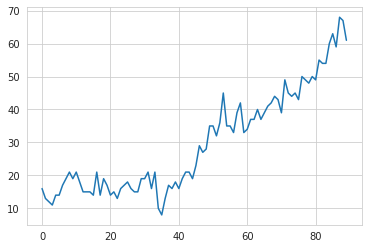

In [32]:
plt.plot(conda_times + pip_times)

In [33]:
dp_df

,python,numpy,pandas,matplotlib,gammapy,ipython,cython,jupyter,jupyterlab,pyyaml,...,sympy~=1.7,-egit+https://github.com/diana-hep/pyhf.git,"pyhf[tensorflow,torch,minuit,xmlio]",https://download.pytorch.org/whl/cpu/torch-1.3.1%2bcpu-cp37-cp37m-linux_x86_64.whl,https://download.pytorch.org/whl/cpu/torchvision-0.4.2%2bcpu-cp37-cp37m-linux_x86_64.whl,hpbandster\r, i m b a l a n c e d - l e a r n = = 0 . 6 . 2 \r , i m b l e a r n = = 0 . 0 \r , s c i k i t - m u l t i l e a r n = = 0 . 2 . 0 \r , w g e t = = 3 . 2 \r 
13922,3.7,Default,Default,Default,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13932,3.7.0,1.18.1,0.25,3.2.1,0.17,7.10,Default,Default,2.0.1,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13934,3.7.0,1.18.1,0.25,3.2.1,0.17,7.10,Default,Default,2.0.1,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13935,3.7.0,1.18.1,0.25,3.2.1,0.17,7.10,Default,Default,2.0.1,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13936,3.7.0,1.18.1,0.25,3.2.1,0.17,7.10,Default,Default,2.0.1,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166047,NaN,1.15.1,NaN,2.2.3,NaN,6.5.0,NaN,1.0.0,0.34.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166048,NaN,Default,Default,Default,NaN,Default,Default,Default,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166070,NaN,Default,NaN,Default,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dp_df.index.unique()

In [ ]:
dp_df = dp_df.reset_index().groupby("index").first()
dp_df

In [ ]:
#dp_df.drop(dp_df.columns[delete_indices], axis=1, inplace=True)

pickle file is 12GB after saving??? hdf5 has some weird error.

In [ ]:
dp_df.to_pickle("./full_dp_df.pkl")
#dp_df.to_hdf('dp_df.h5', key='dp_df', mode='w')
#dp_df.to_csv("dp_df.csv")
#with pd.HDFStore('dpdf.h5',  mode='w') as store:
 #   store.append('dpdf', dp_df, data_columns= dp_df.columns, format='table')

<a name='lpick'></a>
## 9. Load pickle

<br>

In [ ]:
r1 = datetime.datetime.now()

sdf = pd.read_pickle("./temp_dp_df.pkl")
#sdf = pd.read_hdf('dp_df.h5', 'dp_df')
#sdf = pd.read_csv("dp_df.csv", error_bad_lines=False)

r2 = datetime.datetime.now()
print((r2 - r1).seconds)

In [117]:
sdf

,python,numpy,pandas,matplotlib,gammapy,ipython,cython,jupyter,jupyterlab,pyyaml,...,sympy~=1.7,-egit+https://github.com/diana-hep/pyhf.git,"pyhf[tensorflow,torch,minuit,xmlio]",https://download.pytorch.org/whl/cpu/torch-1.3.1%2bcpu-cp37-cp37m-linux_x86_64.whl,https://download.pytorch.org/whl/cpu/torchvision-0.4.2%2bcpu-cp37-cp37m-linux_x86_64.whl,hpbandster\r, i m b a l a n c e d - l e a r n = = 0 . 6 . 2 \r , i m b l e a r n = = 0 . 0 \r , s c i k i t - m u l t i l e a r n = = 0 . 2 . 0 \r , w g e t = = 3 . 2 \r 
13922,3.7,Default,Default,Default,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13932,3.7.0,1.18.1,0.25,3.2.1,0.17,7.10,Default,Default,2.0.1,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13934,3.7.0,1.18.1,0.25,3.2.1,0.17,7.10,Default,Default,2.0.1,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13935,3.7.0,1.18.1,0.25,3.2.1,0.17,7.10,Default,Default,2.0.1,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13936,3.7.0,1.18.1,0.25,3.2.1,0.17,7.10,Default,Default,2.0.1,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166047,NaN,1.15.1,NaN,2.2.3,NaN,6.5.0,NaN,1.0.0,0.34.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166048,NaN,Default,Default,Default,NaN,Default,Default,Default,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166070,NaN,Default,NaN,Default,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a name='leda'></a>
## 10. Library EDA

<br>

In [ ]:
sdf.count().sort_values(ascending=False).head(20).plot.bar()

In [ ]:
labels = sdf.count().sort_values(ascending=False).head(20).index
plt.figure(figsize=(16,13))
heatmap_df = sdf[labels].notnull().astype('int')
cor = heatmap_df.corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu", linewidths=.5)

In [ ]:
sdf.count(axis=1).plot.hist(cumulative=True, density=1, bins=100)

In [ ]:
sdf.count(axis=1).plot.hist(cumulative=True, density=1, bins=np.logspace(np.log10(1),np.log10(100), 15))

In [ ]:
sdf.count(axis=1).plot(x = 'value', y = 'cdf', grid = True)

<a name='veda'></a>
## 11. Library Version EDA

<br>

requested versions:

In [ ]:
def take_last(splitlist, index):
    try:
        return splitlist[index][-1]
    except:
        return ''

def lib_version_dist(col):
    mb_list = dp_df[col].tolist()
    mb_list = list(filter(lambda a: (a != None) and (a != 'Default'), mb_list))
    sp_list = []
    s0_list = []
    for i in mb_list:
        sp_string = ''
        splitlist = i.split('.')
        if len(splitlist) > 0:
            sp_string = sp_string + take_last(splitlist, 0)
            s0_list.append(sp_string)
            if len(splitlist) > 1:
                sp_string = sp_string + '.' + take_last(splitlist, 1)
                if len(splitlist) > 2:
                    sp_string = sp_string + '.' + take_last(splitlist, 2)

        sp_list.append(sp_string)

    fig, axs = plt.subplots(2, 1, constrained_layout=True)
    fig.set_size_inches(16, 8)
    #plot1 = plt.figure(figsize=(20,10))
    axs[0].set_title(col, fontsize=24)
    chart1 = sns.countplot(np.sort(sp_list), ax=axs[0])
    _ = chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)
    chart2 = sns.countplot(np.sort(s0_list), ax=axs[1])
    _ = chart2.set_xticklabels(chart2.get_xticklabels(), rotation=0)
    fig.show()

    
lib_version_dist("matplotlib")

In [ ]:
for i in ['numpy', 'pandas', 'python', 'scipy']:
    lib_version_dist(i)

<a name='cpdiff'></a>
## 12. Conda/pip differences

<br>

Let's say we want a table with just conda = 1.

In [ ]:
dp_df[dp_df["CONDAe"] == 1].drop(["CONDAe", "PIPe"], axis=1)

Or both:

In [ ]:
dp_df[dp_df["CONDAe"] == 1][dp_df["PIPe"] == 1].drop(["CONDAe", "PIPe"], axis=1)

<a name='hgg'></a>
## 13. Heatmap Graph generation

<br>

In [35]:
sdf = sdf.drop(["CONDAe", "PIPe"], axis=1)

KeyError: "['CONDAe' 'PIPe'] not found in axis"

In [38]:
hgg_labels = sdf.count().sort_values(ascending=False).head(1200).index
hgg_df = sdf[hgg_labels].notnull().astype('int')
hgg_df

,numpy,matplotlib,pandas,scipy,ipywidgets,python,seaborn,pip,scikit-learn,ipython,...,holidays,r-hms,r-rematch,ipydatawidgets,jupyter_server,wurlitzer,twisted,pyvo,r-fs,et_xmlfile
13922,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13932,1,1,1,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
13934,1,1,1,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
13935,1,1,1,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
13936,1,1,1,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166047,1,1,0,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
166048,1,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
166050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
166070,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


There's probably a much faster way to do it (this is O(n^2)). I wanted to create something like a heatmap dataframe that has the similarity score between any two columns. Will be using cosine similarity.

In [ ]:
a = [1,1,1]
b = [1,1,1]
print(1 - cosine(hgg_df["numpy"], hgg_df["scipy"]))

In [39]:
edge_list = pd.DataFrame(columns= ['Source', 'Target', 'Weight'])
counter = 0
a = datetime.datetime.now()
for col1 in hgg_df:
    for col2 in hgg_df:
        if col1 < col2:
            score = 1 - cosine(hgg_df[col1], hgg_df[col2])
            edge_list = edge_list.append({'Source': col2, 'Target': col1, 'Weight': score}, ignore_index=True)
        counter += 1
        if counter % 10000 == 0:
            b = datetime.datetime.now()
            print(str(counter) + ": " + str((b - a).seconds))
            a = datetime.datetime.now()
            
edge_list

10000: 14
20000: 14
30000: 19
40000: 14
50000: 13
60000: 22
70000: 21
80000: 23
90000: 17
100000: 16
110000: 31
120000: 26
130000: 22
140000: 25
150000: 21
160000: 18
170000: 25
180000: 23
190000: 23
200000: 26
210000: 22
220000: 32
230000: 30
240000: 30
250000: 21
260000: 33
270000: 28
280000: 24
290000: 37
300000: 30
310000: 47
320000: 36
330000: 33
340000: 37
350000: 26
360000: 38
370000: 30
380000: 33
390000: 33
400000: 49
410000: 32
420000: 54
430000: 38
440000: 27
450000: 55
460000: 35
470000: 36
480000: 53
490000: 56
500000: 42
510000: 60
520000: 34
530000: 52
540000: 44
550000: 55
560000: 42
570000: 52
580000: 57
590000: 49
600000: 49
610000: 34
620000: 66
630000: 54
640000: 62
650000: 29
660000: 45
670000: 74
680000: 54
690000: 45
700000: 54
710000: 45
720000: 66
730000: 67
740000: 61
750000: 64
760000: 66
770000: 58
780000: 58
790000: 46
800000: 42
810000: 58
820000: 40
830000: 72
840000: 69
850000: 57
860000: 48
870000: 74
880000: 74
890000: 58
900000: 52
910000: 72
920000: 

,Source,Target,Weight
0,pandas,numpy,0.694548
1,scipy,numpy,0.655239
2,python,numpy,0.379810
3,seaborn,numpy,0.435958
4,pip,numpy,0.336753
...,...,...,...
719395,jupyter_server,et_xmlfile,0.074627
719396,wurlitzer,et_xmlfile,0.641791
719397,twisted,et_xmlfile,0.044776
719398,pyvo,et_xmlfile,0.000000


In [115]:
#edge_list.to_pickle("./edge_list_L1200_Dfull.pkl")

<a name='pgg'></a>
## 14. Probability Transition Graph Generation

<br>

How probability works:

In [ ]:
len(hgg_df[hgg_df["numpy"] == hgg_df["scipy"]]) / len(hgg_df)

In [ ]:
def prob_score(col1, col2):
    return len(hgg_df[hgg_df[col1] == hgg_df[col2]]) / len(hgg_df)

In [ ]:
edge_list_p = pd.DataFrame(columns= ['Source', 'Target', 'Weight'])
counter = 0
a = datetime.datetime.now()
for col1 in hgg_df:
    for col2 in hgg_df:
        if col1 < col2:
            score = prob_score(col1, col2)
            edge_list_p = edge_list_p.append({'Source': col2, 'Target': col1, 'Weight': score}, ignore_index=True)
        counter += 1
        if counter % 10000 == 0:
            b = datetime.datetime.now()
            print(str(counter) + ": " + str((b - a).seconds))
            a = datetime.datetime.now()
            
edge_list_p

<a name='nex'></a>
## 15. NetworkX Setup

<br>

In [40]:
D = nx.convert_matrix.from_pandas_edgelist(edge_list,'Source','Target',['Weight'],nx.DiGraph)
G = nx.DiGraph.to_undirected(D)

In [ ]:
nx.info(G)

In [111]:
threshold = 0.95
edge_list[edge_list["Weight"] > threshold]

,Source,Target,Weight
14514,kiwisolver,cycler,0.972555
22025,pyzmq,pickleshare,0.953884
26793,pickleshare,jedi,0.962731
26797,parso,jedi,0.981857
28319,pickleshare,parso,0.966402
...,...,...,...
718396,r-spatial,r-fs,0.977805
718397,r-rvest,r-fs,0.977805
718400,r-generics,r-fs,1.000000
718401,r-hms,r-fs,0.985075


In [105]:
edge_list_trimmed = edge_list[edge_list["Weight"] > threshold]
Dt = nx.convert_matrix.from_pandas_edgelist(edge_list_trimmed,'Source','Target',['Weight'],nx.DiGraph)
Gt = nx.DiGraph.to_undirected(Dt)

<a name='nv'></a>
## 16. Basic Visualizations

<br>

In [ ]:
#nx.draw(G)

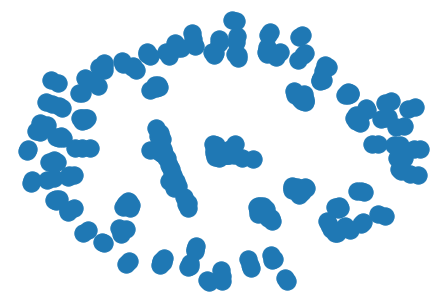

In [112]:
nx.draw(Gt)

In [73]:
options = {
    "font_size": 8,
    "node_size": 6,
    "node_color": "red",
    "edgecolors": "black",
    "linewidths": 10,
    "width": 0.15,
}

#plt.figure(3,figsize=(40,40)) 
#nx.draw_networkx(G, **options)
#plt.show()

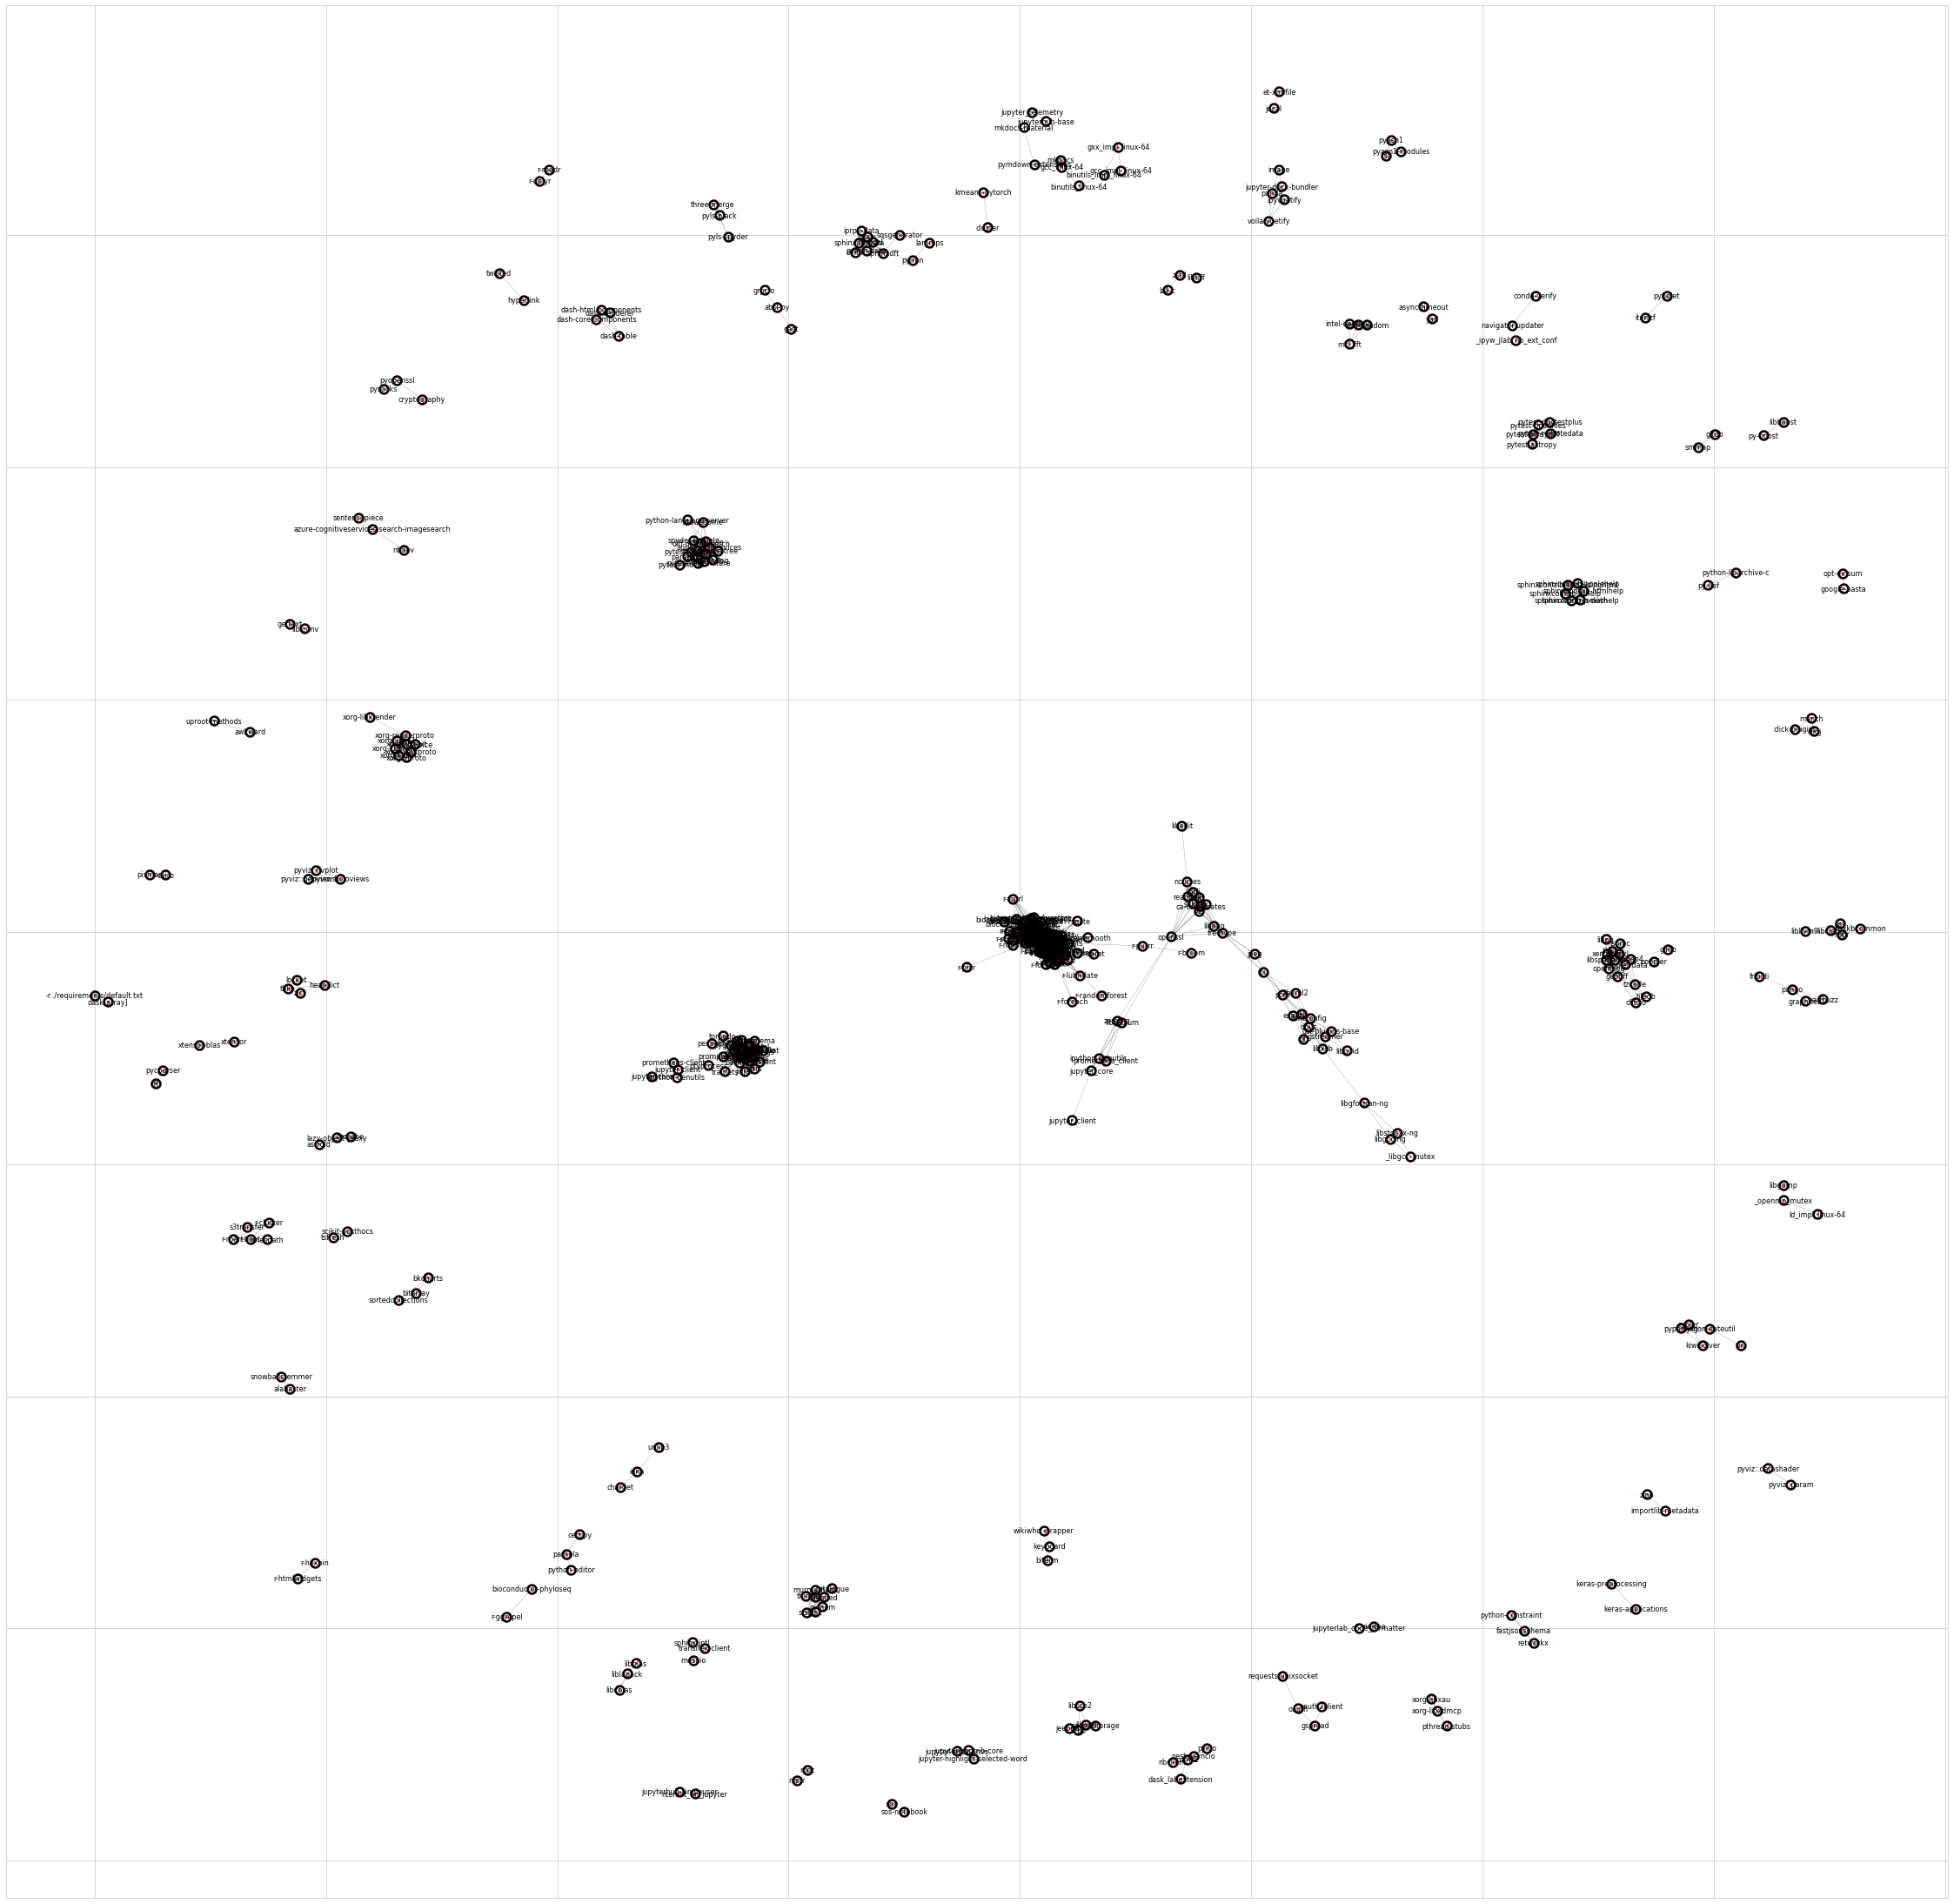

In [113]:
plt.figure(3,figsize=(40,40)) 
nx.draw_networkx(Gt, **options)

<a name='fnl'></a>
## 17. NetworkX graph to Gephi

<br>

After looking online awhile, it seems like Bokeh + NetworkX visualizations just don't have that much functionality compared to a program like Gephi.

In [41]:
nx.write_gexf(G, "FULL_cos_sim_dp_df.gexf")

<a name='end'></a>
## 18. More visualizations

<br>

In [89]:
bokeh.io.output_notebook(INLINE)
plot = figure(title="Networkx Integration Demonstration", x_range=(-1.1,1.1), y_range=(-1.1,1.1),
              tools="", toolbar_location=None)

graph = from_networkx(Gt, nx.spring_layout, scale=2, center=(0,0))
plot.renderers.append(graph)

output_file("networkx_graph.html")
show(plot)

Loading BokehJS ...